In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [20]:
df = pd.read_csv('clean_wo_extend.csv')
df

,coid,mdate,Industry_Eng,Transaction,Close,Open,PBR_TWSE,Volume_1000_Shares,PER_TWSE,Dividend_Yield_TWSE,...,Operating_Income_Rate_percent_Q,Return_Rate_on_Equity_A_percent_Q,upper_band2,upper_band1,centerline,lower_band1,lower_band2,RSI,"Component_Stock(2:TWN50, 1:MidCap100, 0:None)","Signals(1:Buy,0:None,-1:Sell)"
0,1101,2021-01-04,M1100 Cement,5884.0,43.20,43.20,1.32,13744.0,10.29,6.94,...,19.09,1.68,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
1,1101,2021-01-05,M1100 Cement,5512.0,43.10,43.25,1.32,16631.0,10.26,6.96,...,19.09,1.68,NaN,NaN,NaN,NaN,NaN,0.000000,2,NaN
2,1101,2021-01-06,M1100 Cement,7543.0,42.95,43.10,1.32,19007.0,10.23,6.98,...,19.09,1.68,NaN,NaN,NaN,NaN,NaN,0.000000,2,NaN
3,1101,2021-01-07,M1100 Cement,8180.0,42.85,42.95,1.31,21050.0,10.20,7.00,...,19.09,1.68,NaN,NaN,NaN,NaN,NaN,0.000000,2,NaN
4,1101,2021-01-08,M1100 Cement,7092.0,42.95,42.90,1.32,17406.0,10.23,6.98,...,19.09,1.68,NaN,NaN,NaN,NaN,NaN,22.222222,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269405,6139,2023-12-25,M2300 Electronics,10977.0,154.00,161.00,3.51,15533.0,16.68,2.27,...,10.19,9.47,168.708737,159.416868,150.125,140.833132,131.541263,70.707071,0,0.0
269406,6139,2023-12-26,M2300 Electronics,1997.0,156.50,154.00,3.57,2442.0,16.96,2.24,...,10.19,9.47,169.250616,159.850308,150.450,141.049692,131.649384,71.844660,0,0.0
269407,6139,2023-12-27,M2300 Electronics,2425.0,156.00,155.00,3.56,3225.0,16.90,2.24,...,10.19,9.47,169.780025,160.377512,150.975,141.572488,132.169975,68.421053,0,0.0
269408,6139,2023-12-28,M2300 Electronics,9370.0,164.50,156.50,3.75,12115.0,17.82,2.13,...,10.19,9.47,171.478721,161.689360,151.900,142.110640,132.321279,70.000000,0,0.0


In [21]:
coid_union = pd.read_csv('top_profit_coid_union.csv')

coid_list = list(coid_union['coid'])


sub_df = df[df['coid'].isin(coid_list)]
df

In [23]:
df = sub_df

In [24]:
df = df.dropna()
df = df.reset_index(drop=True)

In [26]:
df['mdate'] = pd.to_datetime(df['mdate'])


df['year'] = df['mdate'].dt.year
df['month'] = df['mdate'].dt.month
df['day'] = df['mdate'].dt.day
df['dayofweek'] = df['mdate'].dt.dayofweek
df['dayofyear'] = df['mdate'].dt.dayofyear
df['quarter'] = df['mdate'].dt.quarter

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

In [27]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Component_Stock(2:TWN50, 1:MidCap100, 0:None)']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=['ComponentStock:None','MidCap100','TWN50'])
df_encoded = pd.concat([df, encoded_df], axis=1)

In [28]:
split_date = '2023-01-01'
cutoff_date = '2023-07-01'

train_df = df_encoded[df_encoded['mdate'] < split_date]
test_df = df_encoded[(df_encoded['mdate'] >= split_date) & (df_encoded['mdate'] < cutoff_date)]
backtest_df = df_encoded[df_encoded['mdate'] >= cutoff_date]

In [29]:
X_train = train_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_train = train_df['Signals(1:Buy,0:None,-1:Sell)']
X_test = test_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_test = test_df['Signals(1:Buy,0:None,-1:Sell)']
X_backtest = backtest_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_backtest = backtest_df['Signals(1:Buy,0:None,-1:Sell)']

# X_train = train_df.drop(columns=['coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
# y_train = train_df['Signals(1:Buy,0:None,-1:Sell)']

In [30]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

In [32]:
param_grid = {
    'n_estimators': [100, 150, 300, 500],
    'criterion':['entropy'],
    'max_depth': [None],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,3]
}

best_score = 0
best_f1 = 0
best_params = None
best_cm = None
best_pred = pd.Series()

for params in ParameterGrid(param_grid):
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', labels = [-1,0,1])
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

    if f1 > best_f1:
        best_pred = y_pred
        y_pred_backtest = model.predict(X_backtest)
        best_score = score
        best_f1 = f1
        best_cm = cm
        best_params = params
        y_pred_prob = model.predict_proba(X_test)

print("Best parameters found: ", best_params)
print("Best validation accuracy: ", best_score)
print("Best F1 Score: ", best_f1)
print('Best Confusion Matrix: ', best_cm)


C:\Users\USER\AppData\Local\Temp\ipykernel_10244\1239001358.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()


Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best validation accuracy:  0.8236725663716814
Best F1 Score:  0.7440332317364479
Best Confusion Matrix:  [[   0  543    0]
 [   0 3723    0]
 [   0  254    0]]


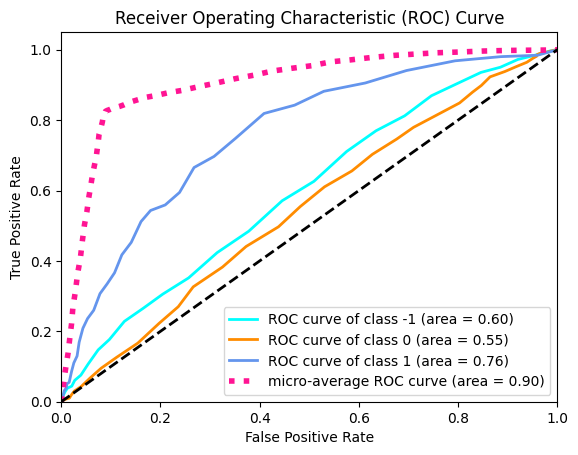

In [33]:
classes = [-1, 0, 1]

y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
df = pd.read_csv('clean_wo_extend.csv')

y_pred_t = pd.Series(best_pred)
test_df = test_df.reset_index(drop=True)
result_test = pd.concat([test_df, y_pred_t], axis = 1)
result_test = result_test.rename({0:'Prediction'}, axis='columns')


result_test.to_csv('prediction result(test) by RF(new).csv', header = True, index = False)


y_pred_bt = pd.Series(y_pred_backtest)
backtest_df = backtest_df.reset_index(drop=True)
result_backtest = pd.concat([backtest_df, y_pred_bt], axis = 1)
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')


result_backtest.to_csv('prediction result(backtest) by RF(new).csv', header = True, index = False)

In [35]:
y_train = y_train.replace(-1,2)
y_test = y_test.replace(-1,2)
params = {'booster':['gbtree'],
          'eta':[0.5],
          'max_depth':[8],
          'max_delta_step':[0],
         'num_class':[3],
         'objective':['multi:softmax']}

best_score = 0
best_f1 = 0
best_params = None
best_cm = None
best_pred_xgb = pd.Series()


for params in ParameterGrid(params):
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', labels = [-1,0,1])
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])

    if f1 > best_f1:
        best_pred_xgb = y_pred
        y_pred_backtest = model.predict(X_backtest)
        best_score = score
        best_f1 = f1
        best_cm = cm
        best_params = params
        y_pred_prob = model.predict_proba(X_test)

print("Best parameters found: ", best_params)
print("Best validation accuracy: ", best_score)
print("Best F1 Score: ", best_f1)
print('Best Confusion Matrix: ', best_cm)

# Best parameters found:  {'booster': 'gbtree', 'eta': 0.3, 'max_delta_step': 0, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1}
# Best validation accuracy:  0.8288793589888275

C:\Users\USER\AppData\Local\Temp\ipykernel_10244\4211463618.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred_xgb = pd.Series()


Best parameters found:  {'booster': 'gbtree', 'eta': 0.5, 'max_delta_step': 0, 'max_depth': 8, 'num_class': 3, 'objective': 'multi:softmax'}
Best validation accuracy:  0.8139380530973451
Best F1 Score:  0.8457518406583314
Best Confusion Matrix:  [[  11  529    3]
 [  38 3654   31]
 [   0  240   14]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


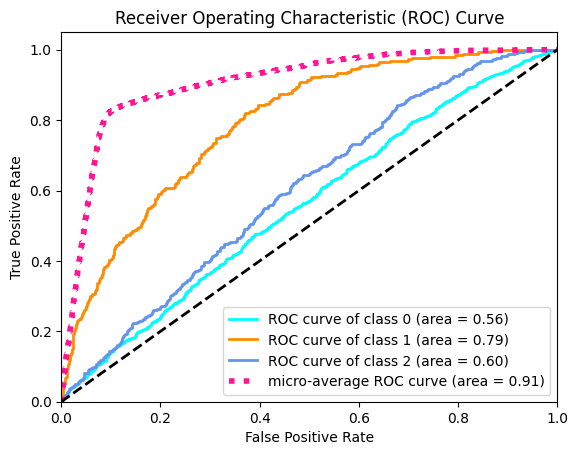

In [38]:
classes = [0,1,2]

y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
y_pred_t = pd.Series(best_pred_xgb)
y_pred_t = y_pred_t.replace(2,-1)
test_df = test_df.reset_index(drop=True)
result_test = pd.concat([test_df, y_pred_t], axis = 1)
result_test = result_test.rename({0:'Prediction'}, axis='columns')


result_test.to_csv('prediction result(test) by XGboost(new).csv', header = True, index = False)

y_pred_bt = pd.Series(y_pred_backtest)
y_pred_bt = y_pred_bt.replace(2,-1)
backtest_df = backtest_df.reset_index(drop=True)
result_backtest = pd.concat([backtest_df, y_pred_bt], axis = 1)
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')


result_backtest.to_csv('prediction result(backtest) by XGboost(new).csv', header = True, index = False)

# Model 2: top 30 XGB

In [5]:
df = pd.read_csv('clean_wo_extend.csv')


In [6]:
coid1 = pd.read_csv('top_profit_coidprediction(backtest) result by XGBoost(with time variable).csv')
coid2 = pd.read_csv('top_profit_coid_bmpsprediction(backtest) result by XGBoost(with time variable).csv')

In [7]:
c1 = set(coid1['coid'].unique())
c2 = set(coid2['coid'].unique())

In [8]:
coid_list = list(c1.union(c2))

# Get the subset of the DataFrame where column 'A' contains values in the list
subset_df = df[df['coid'].isin(coid_list)]


In [9]:
df = subset_df
df = df.dropna()
df = df.reset_index(drop=True)

df['mdate'] = pd.to_datetime(df['mdate'])

df['year'] = df['mdate'].dt.year
df['month'] = df['mdate'].dt.month
df['day'] = df['mdate'].dt.day
df['dayofweek'] = df['mdate'].dt.dayofweek
df['dayofyear'] = df['mdate'].dt.dayofyear
df['quarter'] = df['mdate'].dt.quarter

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)


In [10]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Component_Stock(2:TWN50, 1:MidCap100, 0:None)']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=['ComponentStock:None','MidCap100','TWN50'])
df_encoded = pd.concat([df, encoded_df], axis=1)

In [11]:
split_date = '2023-01-01'
cutoff_date = '2023-07-01'

train_df = df_encoded[df_encoded['mdate'] < split_date]
test_df = df_encoded[(df_encoded['mdate'] >= split_date) & (df_encoded['mdate'] < cutoff_date)]
backtest_df = df_encoded[df_encoded['mdate'] >= cutoff_date]

In [12]:
X_train = train_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_train = train_df['Signals(1:Buy,0:None,-1:Sell)']
X_test = test_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_test = test_df['Signals(1:Buy,0:None,-1:Sell)']
X_backtest = backtest_df.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
y_backtest = backtest_df['Signals(1:Buy,0:None,-1:Sell)']

In [68]:
y_train = y_train.replace(-1,2)
y_test = y_test.replace(-1,2)

model = xgb.XGBClassifier(booster='gbtree', eta = 0.5, max_delta_step= 0, 
                          max_depth = 8, num_class = 3, objective = 'multi:softmax')
model.fit(X_train, y_train)

y_pred_t = model.predict(X_test)
y_pred_bt = model.predict(X_backtest)    

score = accuracy_score(y_test, y_pred_t)
f1 = f1_score(y_test, y_pred_t, average='weighted', labels = [2,0,1])
cm = confusion_matrix(y_test, y_pred_t, labels=[2, 0, 1])

print("Accuracy: ", score)
print("F1 score: ", f1)
print('Best Confusion Matrix: ', cm)

Accuracy:  0.8155420353982301
F1 score:  0.7522281132704144
Best Confusion Matrix:  [[   8  406    1]
 [  23 2927   37]
 [   2  198   14]]


In [69]:
y_pred_t = pd.Series(y_pred_t)
y_pred_t = y_pred_t.replace(2,-1)
test_df = test_df.reset_index(drop=True)
result_test = pd.concat([test_df, y_pred_t], axis = 1)
result_test = result_test.rename({0:'Prediction'}, axis='columns')


result_test.to_csv('prediction result(test) by XGboost(top 30).csv', header = True, index = False)


y_pred_bt = pd.Series(y_pred_bt)
y_pred_bt = y_pred_bt.replace(2,-1)
backtest_df = backtest_df.reset_index(drop=True)
result_backtest = pd.concat([backtest_df, y_pred_bt], axis = 1)
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')


result_backtest.to_csv('prediction result(backtest) by XGboost(top 30).csv', header = True, index = False)

In [ ]:
import pickle
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Top 30 RF

In [13]:
model = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1,
                               min_samples_split = 3, n_estimators = 150, random_state=42)
model.fit(X_train, y_train)

y_pred_t = model.predict(X_test)
y_pred_bt = model.predict(X_backtest)    

score = accuracy_score(y_test, y_pred_t)
f1 = f1_score(y_test, y_pred_t, average='weighted', labels = [2,0,1])
cm = confusion_matrix(y_test, y_pred_t, labels=[2, 0, 1])

print("Accuracy: ", score)
print("F1 score: ", f1)
print('Best Confusion Matrix: ', cm)

Accuracy:  0.8260508849557522
F1 score:  0.8442546657978257
Best Confusion Matrix:  [[   0    0    0]
 [   0 2987    0]
 [   0  214    0]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
y_pred_t = pd.Series(y_pred_t)
test_df = test_df.reset_index(drop=True)
result_test = pd.concat([test_df, y_pred_t], axis = 1)
result_test = result_test.rename({0:'Prediction'}, axis='columns')


result_test.to_csv('prediction result(test) by RF(top 30).csv', header = True, index = False)


y_pred_bt = pd.Series(y_pred_bt)
backtest_df = backtest_df.reset_index(drop=True)
result_backtest = pd.concat([backtest_df, y_pred_bt], axis = 1)
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')


result_backtest.to_csv('prediction result(backtest) by RF(top 30).csv', header = True, index = False)

# Model 3 (industry, XGB)

In [72]:
df = pd.read_csv('clean_wo_extend.csv')

In [73]:
df = df.dropna()
df = df.reset_index(drop=True)

df['mdate'] = pd.to_datetime(df['mdate'])

df['year'] = df['mdate'].dt.year
df['month'] = df['mdate'].dt.month
df['day'] = df['mdate'].dt.day
df['dayofweek'] = df['mdate'].dt.dayofweek
df['dayofyear'] = df['mdate'].dt.dayofyear
df['quarter'] = df['mdate'].dt.quarter

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

In [74]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Component_Stock(2:TWN50, 1:MidCap100, 0:None)']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=['ComponentStock:None','MidCap100','TWN50'])
df_encoded = pd.concat([df, encoded_df], axis=1)

In [75]:
df_encoded['Signals(1:Buy,0:None,-1:Sell)'] = df_encoded['Signals(1:Buy,0:None,-1:Sell)'].replace(-1,2)
split_date = '2023-01-01'
cutoff_date = '2023-07-01'

result_test = pd.DataFrame()
result_backtest = pd.DataFrame()

params = {'eta': [0.5],
          'max_depth': [8],
          'max_delta_step': [0],
          'learning_rate': [0.01, 0.1],
          'objective': ['multi:softmax', 'multi:softprob']}

for ind in df_encoded['Industry_Eng'].unique():
    sub_df = df_encoded[df_encoded['Industry_Eng'] == ind]
    sub_train = sub_df[sub_df['mdate'] < split_date]
    sub_test = sub_df[(sub_df['mdate'] >= split_date) & (sub_df['mdate'] < cutoff_date)]
    sub_backtest = sub_df[sub_df['mdate'] >= cutoff_date]
    
    X_train = sub_train.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_train = sub_train['Signals(1:Buy,0:None,-1:Sell)']
    X_test = sub_test.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_test = sub_test['Signals(1:Buy,0:None,-1:Sell)']
    X_backtest = sub_backtest.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_backtest = sub_backtest['Signals(1:Buy,0:None,-1:Sell)']
    
    
    best_score = 0
    best_f1 = 0
    best_pred = pd.Series()

    for params_set in ParameterGrid(params):
        model = xgb.XGBClassifier(booster = 'gbtree', num_class = 3, **params_set)
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted', labels = [2,0,1])
        
        if f1 > best_f1:
            best_pred = y_pred
            y_pred_backtest = model.predict(X_backtest)
            best_f1 = f1
    
    best_pred = pd.Series(best_pred)
    y_pred_backtest = pd.Series(y_pred_backtest)
    best_pred = best_pred.replace(2,-1)
    y_pred_backtest = y_pred_backtest.replace(2,-1)
    sub_test = sub_test.reset_index(drop=True)
    sub_backtest = sub_test.reset_index(drop=True)
    sub_test = pd.concat([sub_test, best_pred], axis = 1)
    sub_backtest = pd.concat([sub_backtest, y_pred_backtest], axis = 1)
    result_test = pd.concat([result_test, sub_test], axis = 0)
    result_backtest = pd.concat([result_backtest, sub_backtest], axis = 0)

C:\Users\USER\AppData\Local\Temp\ipykernel_1760\2967694620.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\2967694620.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\2967694620.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\2967694620.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = 

KeyboardInterrupt: 

In [19]:
result_test = result_test.rename({0:'Prediction'}, axis='columns')
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')
result_test.to_csv('XGB predictions of test set(industry).csv', header = True, index = False)
result_backtest.to_csv('XGB predictions of backtest set(industry).csv', header = True, index = False)

# Model 4 (industry, RF)

In [20]:
df = pd.read_csv('clean_wo_extend.csv')

In [21]:
df = df.dropna()
df = df.reset_index(drop=True)

df['mdate'] = pd.to_datetime(df['mdate'])

df['year'] = df['mdate'].dt.year
df['month'] = df['mdate'].dt.month
df['day'] = df['mdate'].dt.day
df['dayofweek'] = df['mdate'].dt.dayofweek
df['dayofyear'] = df['mdate'].dt.dayofyear
df['quarter'] = df['mdate'].dt.quarter

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

In [22]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Component_Stock(2:TWN50, 1:MidCap100, 0:None)']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=['ComponentStock:None','MidCap100','TWN50'])
df_encoded = pd.concat([df, encoded_df], axis=1)

In [25]:
split_date = '2023-01-01'
cutoff_date = '2023-07-01'

result_test = pd.DataFrame()
result_backtest = pd.DataFrame()

params  = { 'n_estimators': [50, 100, 150, 300, 500],
           'criterion':['entropy', 'gini'],
           'max_depth': [None],
           'min_samples_split': [2,3,4,5],
           'min_samples_leaf': [1,3,5]
}

for ind in df_encoded['Industry_Eng'].unique():
    sub_df = df_encoded[df_encoded['Industry_Eng'] == ind]
    sub_train = sub_df[sub_df['mdate'] < split_date]
    sub_test = sub_df[(sub_df['mdate'] >= split_date) & (sub_df['mdate'] < cutoff_date)]
    sub_backtest = sub_df[sub_df['mdate'] >= cutoff_date]
    
    X_train = sub_train.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_train = sub_train['Signals(1:Buy,0:None,-1:Sell)']
    X_test = sub_test.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_test = sub_test['Signals(1:Buy,0:None,-1:Sell)']
    X_backtest = sub_backtest.drop(columns=['mdate','coid','Industry_Eng','Component_Stock(2:TWN50, 1:MidCap100, 0:None)','Signals(1:Buy,0:None,-1:Sell)'])
    y_backtest = sub_backtest['Signals(1:Buy,0:None,-1:Sell)']
    
    
    best_score = 0
    best_f1 = 0
    best_pred = pd.Series()

    for params_set in ParameterGrid(params):
        model = RandomForestClassifier(**params_set)
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted', labels = [-1,0,1])
        
        if f1 > best_f1:
            best_pred = y_pred
            y_pred_backtest = model.predict(X_backtest)
            best_f1 = f1
    
    best_pred = pd.Series(best_pred)
    y_pred_backtest = pd.Series(y_pred_backtest)
    sub_test = sub_test.reset_index(drop=True)
    sub_backtest = sub_test.reset_index(drop=True)
    sub_test = pd.concat([sub_test, best_pred], axis = 1)
    sub_backtest = pd.concat([sub_backtest, y_pred_backtest], axis = 1)
    result_test = pd.concat([result_test, sub_test], axis = 0)
    result_backtest = pd.concat([result_backtest, sub_backtest], axis = 0)

C:\Users\USER\AppData\Local\Temp\ipykernel_1760\3950292586.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\3950292586.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\3950292586.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_1760\3950292586.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_pred = 

KeyboardInterrupt: 

In [ ]:
result_test = result_test.rename({0:'Prediction'}, axis='columns')
result_backtest = result_backtest.rename({0:'Prediction'}, axis='columns')
result_test.to_csv('RF predictions of test set(industry).csv', header = True, index = False)
result_backtest.to_csv('RF predictions of backtest set(industry).csv', header = True, index = False)